### DSC540 week 9 an 10 assignment
#### Austhor: Xin Tang
#### Date 1/30/24

In [1]:
# Task1: import necessary packages
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import re
import ssl
import urllib.request, urllib.parse, urllib.error
import requests
import json

### Exercise 1
#### Activity 9: scrape the URL of Project Gutenberg's Top 100 eBooks to identify the eBooks' links.

In [2]:
# Task2: Check the SSL certificate.
''' went to Gutenberg.org, clicked the web page and it has https, so it has SSL certificate
'''
#ctx = ssl.create_default_context()
#ctx.check_hostname = False
#ctx.verify_mode = ssl.CERT_NONE

' went to Gutenberg.org, clicked the web page and it has https, so it has SSL certificate\n'

In [3]:
# activity3: Read the HTML from the URL
# fine the top 100 book list link and copy it
url = 'https://gutenberg.org/browse/scores/top'
response = requests.get(url)
print(response.status_code)

200


In [4]:
# activity 4: write a function to check the status of web request
def response_return(request):
    if request.status_code==200:
        print("web request is success!")
        
    else:
        print("request failed!")
       
    
response_return(response)    

web request is success!


In [5]:
# activity 5: Decode the response and pass this on to BeautifulSoup for HTML parsing
contents = response.content.decode(response.encoding)
soup = BeautifulSoup(contents, 'html.parser')

In [16]:
# Activity 6: Find all the href tags and store them in the list of links

b_list=[]
'''
looks like teh first book is shown as this. start with 'a herf=', first book is ebooks/84
<a href="/ebooks/84">Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley (1649)</a>
<a href="/ebooks/160">The Awakening, and Selected Short Stories by Kate Chopin (121)</a>
'''
#Find href tags and store them in the b_list
#check the returned link
#link=soup.find_all('a')
#print(link)
for link in soup.find_all('a'):
    b_list.append(link.get('href'))
    
#b_list[:140]
#first book from top 100books from yesterday is number 33 in list with number as 84
# the last book is number 133 in list with book number as 160


In [17]:
'''
# activity7: Use a regular expression to find the numeric digits in these links
#activity 8: Initialize the empty list to hold the file numbers over an appropriate range
             use regex to find the numeric digits in the link href string. Use the findall method.
'''
# build another empty list
topbooknum=[]

#use list index to find the books
for i in range(33,133):
    link=b_list[i]
    link=link.strip()
    # use Regular expression to find the numeric 0-9 in the string, #append the book number to list
    n=re.findall('[0-9]+',link)
    if len(n)==1:
        topbooknum.append(int(n[0]))

In [7]:
#cross check the result with webpage
print(topbooknum)

[84, 63283, 1342, 2701, 1513, 145, 100, 2641, 37106, 64317, 16389, 11, 6761, 394, 4085, 1080, 67979, 24869, 5197, 174, 844, 2160, 2542, 1259, 5200, 6593, 25344, 76, 98, 72782, 2554, 36034, 72786, 1952, 345, 1400, 6130, 408, 46, 1260, 219, 43, 2591, 1232, 41445, 28054, 1998, 3207, 1661, 1727, 2600, 23, 72781, 2814, 26272, 5740, 15399, 42324, 768, 205, 41128, 58585, 996, 2852, 1497, 72776, 55, 3296, 244, 1184, 5827, 45, 16, 4300, 16328, 74, 514, 67098, 851, 7370, 829, 2148, 8492, 19942, 158, 10, 120, 1934, 36, 20203, 8800, 30254, 1251, 35899, 2680, 41, 4363, 27827, 72785, 160]


In [7]:
#activity 9: What does the soup object's text look like? Use the .text method and print only the first 2,000 characters
# a lot of empty space, the length 6555 include all 100 books.
#print(soup.text[:6555])

In [6]:
#activity 10: Search in the extracted text, find name of the top 100 books
#create book name list
bokname = []
#find start index
start_idx=soup.text.splitlines().index('Top 100 EBooks yesterday')


In [7]:
import pprint
#first 8 are no related list items as topxxxx, so total are 108 items in list
for i in range(108):
    bokname.append(soup.text.splitlines()[start_idx+2+i])
#print(bokname) 
#pprint.pprint(bokname)   
print(len(bokname))

108


In [16]:
'''
create empty title list, then iternate through whole list to find letters ,special characters or 
no enlish characters like é 
'''
lst_titles=[]
for i in range(108):
    id1,id2=re.match('^[a-zA-Zé\s;,. ]*',bokname[i]).span()
    lst_titles.append(bokname[i][id1:id2])

In [17]:
#first 7 are empty top 
for name in lst_titles[8:]:
    print(name)

Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley 
New Mexico Magazine
Pride and Prejudice by Jane Austen 
Moby Dick; Or, The Whale by Herman Melville 
Romeo and Juliet by William Shakespeare 
Middlemarch by George Eliot 
The Complete Works of William Shakespeare by William Shakespeare 
A Room with a View by E. M.  Forster 
Little Women; Or, Meg, Jo, Beth, and Amy by Louisa May Alcott 
The Great Gatsby by F. Scott  Fitzgerald 
The Enchanted April by Elizabeth Von Arnim 
Alice
The Adventures of Ferdinand Count Fathom 
Cranford by Elizabeth Cleghorn Gaskell 
The Adventures of Roderick Random by T.  Smollett 
A Modest Proposal by Jonathan Swift 
The Blue Castle
The R
My Life 
The Picture of Dorian Gray by Oscar Wilde 
The Importance of Being Earnest
The Expedition of Humphry Clinker by T.  Smollett 
A Doll
Twenty years after by Alexandre Dumas and Auguste Maquet 
Metamorphosis by Franz Kafka 
History of Tom Jones, a Foundling by Henry Fielding 
The Scarlet Letter by N

###### End of activity 9

### Exercise 2
#### Activity 10: Building Your Own Movie Database by Reading an API.

In [2]:
#step 1. import related library (done at beginning of notebook)

#step 2. Get API key and store in a file (done outside the notebook)

#step 3 & 4. read key from file, use a self-defined function
def get_file_contents(filename):
    try:
        with open(filename, 'r') as f:
            return f.read().strip()
    except FileNotFoundError:
        print("'%s' file not found" % filename)

        
apikey = get_file_contents('key.txt')  
#print(apikey)

In [3]:
# step 5 &6. assembly the url together
BaseURL = 'http://www.omdbapi.com/?'
mykey = '&apikey='+ apikey
a = 'Titanic'
url = BaseURL + 't=' +str(a) + mykey
#print(url)

In [5]:
# activity 7. Write a utility function called print_json to print the movie data from a JSON file 
# assign the key, use key grab info value inside each key
def print_json(json_data):
    list_keys=['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 
               'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Ratings', 
               'Metascore', 'imdbRating', 'imdbVotes', 'imdbID']
    print("-"*50)
    for k in list_keys:
        if k in list(json_data.keys()):
            print(f"{k}: {json_data[k]}")
    print("-"*50)

In [6]:
''' activity 8. Write a utility function to download a poster of the movie 
    based on the information from the JSON dataset and save it in your local folder
    
    "Poster":"https://m.media-amazon.com/images/M/MV5BMDdmZGU3NDQtY2E5My00ZTliLWIzOTUtMTY4ZGI1YjdiNjk3XkEyXkFqcGdeQXVyNTA4NzY1MzY@._V1_SX300.jpg"
'''
def save_poster(json_data):
    import os
    title = json_data['Title']
    #the poster file link is inside Poster key
    poster_url = json_data['Poster']
    
    # the link end with ',jpg',so pick it up as last item in splited list 
    poster_file_extension=poster_url.split('.')[-1]
    
    # Reads again using the image url
    poster_data = urllib.request.urlopen(poster_url).read()
    
    #read the current directory location using getcwd, then append a new directory as Poster
    savelocation=os.getcwd()+'\\'+'Posters'+'\\'
    #print(savelocation)
    
    # Creates new directory using os.mkdir.
    if not os.path.isdir(savelocation):
        os.mkdir(savelocation)
    
    # reassembly the file name, write using binary format
    filename=savelocation+str(title)+'.'+poster_file_extension
    f=open(filename,'wb')
    f.write(poster_data)
    f.close()

In [9]:
# activity 9. Write a utility function called search_movie to search for a movie by its name
# print info first and save poster in your local folder

def search_movie(title):
    try:
        url = BaseURL + 't=' +str(title) + mykey
        print(f'Retrieving the data of "{title}" now... ')
        print(url)
        #standard step to open url and get jason data
        uh = urllib.request.urlopen(url)
        data = uh.read()
        json_data=json.loads(data)
        
        if json_data['Response']=='True':
            print_json(json_data)
            # is poster value is not empty, then save it.
            if json_data['Poster']!='N/A':
                save_poster(json_data)
        else:
            print("Error encountered: ",json_data['Error'])
    
    except urllib.error.URLError as e:
        print(f"ERROR: {e.reason}")

In [10]:
# activity 10. Write a utility function called search_movie to search for a movie by its name
# print info first and save poster in your local folder

def search_movie(title):
    try:
        url = BaseURL + 't=' +str(title) + mykey
        print(f'Retrieving the data of "{title}" now... ')
        print(url)
        #standard steps to read url for jason data
        uh = urllib.request.urlopen(url)
        data = uh.read()
        json_data=json.loads(data)
        
        if json_data['Response']=='True':
            print_json(json_data)
            #save when poster value is not empty
            if json_data['Poster']!='N/A':
                save_poster(json_data)
        else:
            print("Error encountered: ",json_data['Error'])
    
    except urllib.error.URLError as e:
        print(f"ERROR: {e.reason}")

In [11]:
# activity 10. try it on movie Titanic
search_movie("Titanic")

Retrieving the data of "Titanic" now... 
http://www.omdbapi.com/?t=Titanic&apikey=c5b5cca9
--------------------------------------------------
Title: Titanic
Year: 1997
Rated: PG-13
Released: 19 Dec 1997
Runtime: 194 min
Genre: Drama, Romance
Director: James Cameron
Writer: James Cameron
Actors: Leonardo DiCaprio, Kate Winslet, Billy Zane
Plot: A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.
Language: English, Swedish, Italian, French
Country: United States, Mexico
Awards: Won 11 Oscars. 126 wins & 83 nominations total
Ratings: [{'Source': 'Internet Movie Database', 'Value': '7.9/10'}, {'Source': 'Rotten Tomatoes', 'Value': '88%'}, {'Source': 'Metacritic', 'Value': '75/100'}]
Metascore: 75
imdbRating: 7.9
imdbVotes: 1,261,488
imdbID: tt0120338
--------------------------------------------------


In [14]:
# activity 11: try it on a wrong movie title
search_movie("it-is-error")

Retrieving the data of "it-is-error" now... 
http://www.omdbapi.com/?t=it-is-error&apikey=c5b5cca9
Error encountered:  Movie not found!


###### End of activity 10

### Exercise 3
##### Connect to an API of your choice and do a simple data pull 

In [15]:
# use us population website and pull out data and form a dataframe
# this site do not need api key
URL = "https://datausa.io/api/data?drilldowns=Nation&measures=Population"

#use requests.get
data = requests.get(URL).json()

In [16]:
# data is inside data key, use normalize to get a flat table
df = data['data']
df1=pd.json_normalize(df, max_level=0)

df1

,ID Nation,Nation,ID Year,Year,Population,Slug Nation
0,01000US,United States,2021,2021,329725481,united-states
1,01000US,United States,2020,2020,326569308,united-states
2,01000US,United States,2019,2019,324697795,united-states
3,01000US,United States,2018,2018,322903030,united-states
4,01000US,United States,2017,2017,321004407,united-states
5,01000US,United States,2016,2016,318558162,united-states
6,01000US,United States,2015,2015,316515021,united-states
7,01000US,United States,2014,2014,314107084,united-states
8,01000US,United States,2013,2013,311536594,united-states


###### end of exercise 3

### Exercise 4
##### use data to complete 3 of the following visualizations

In [17]:
# all packages have been loaded up front
# using bostonhousing.csv data first

#import data
df=pd.read_csv("BostonHousing.csv")
#df.descibe()

#renmae medv to price
df.rename(columns = {'medv':'price'}, inplace = True) 
#create a smaller subset
df_sub=df[['crim','zn','indus','rm','age','dis','rad','tax','ptratio','price']]
df_sub.head(10)

,crim,zn,indus,rm,age,dis,rad,tax,ptratio,price
0,0.00632,18.0,2.31,6.575,65.2,4.0900,1,296,15.3,24.0
1,0.02731,0.0,7.07,6.421,78.9,4.9671,2,242,17.8,21.6
2,0.02729,0.0,7.07,7.185,61.1,4.9671,2,242,17.8,34.7
3,0.03237,0.0,2.18,6.998,45.8,6.0622,3,222,18.7,33.4
4,0.06905,0.0,2.18,7.147,54.2,6.0622,3,222,18.7,36.2
5,0.02985,0.0,2.18,6.430,58.7,6.0622,3,222,18.7,28.7
6,0.08829,12.5,7.87,6.012,66.6,5.5605,5,311,15.2,22.9
7,0.14455,12.5,7.87,6.172,96.1,5.9505,5,311,15.2,27.1
8,0.21124,12.5,7.87,5.631,100.0,6.0821,5,311,15.2,16.5
9,0.17004,12.5,7.87,6.004,85.9,6.5921,5,311,15.2,18.9


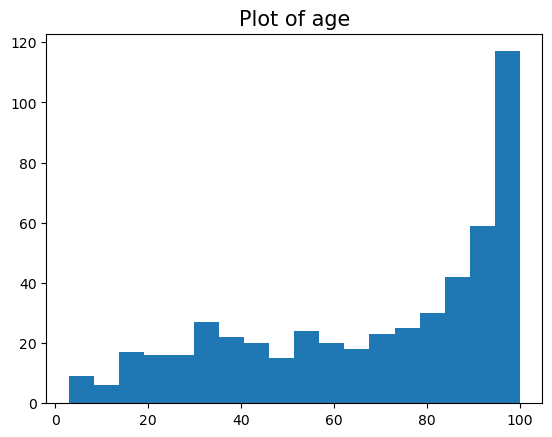

In [18]:
#create a histrogram chart
plt.title("Plot of age",fontsize=15)
plt.hist(df_sub['age'],bins=18)
plt.show()

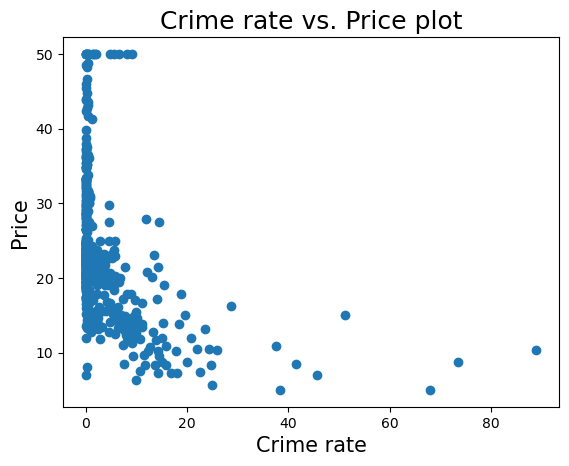

In [19]:
#create a scatter chart
plt.scatter(df_sub['crim'],df_sub['price'])
plt.title("Crime rate vs. Price plot", fontsize=18)
plt.xlabel("Crime rate",fontsize=15)
plt.ylabel("Price",fontsize=15)
plt.show()

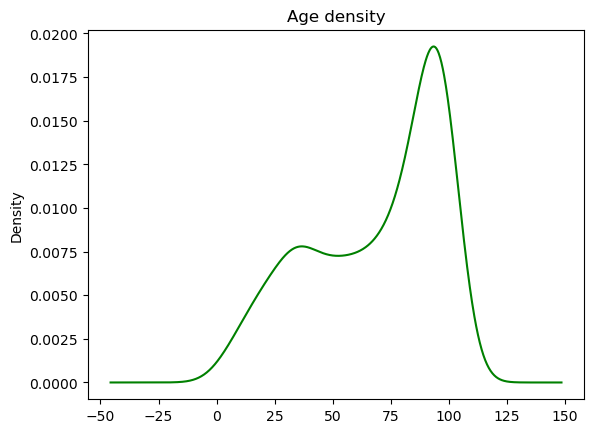

In [20]:
# create a density chart
df_sub.age.plot.density(color='green') 
plt.title('Age density') 
plt.show()

Text(0.5, 1.0, 'ease to access highway (larger is better)')

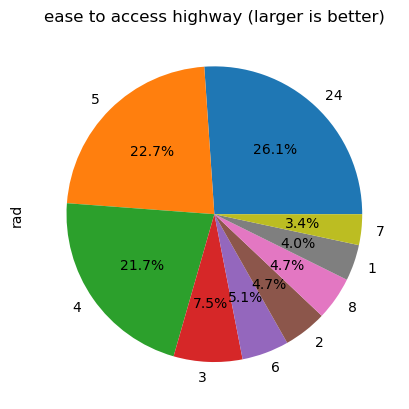

In [21]:
# last, create a pie chart
data =df_sub.rad.value_counts()

data.plot(kind='pie', autopct='%0.1f%%')
plt.title('ease to access highway (larger is better)')

###### end of exercise